# Notebook #4: EDA: exploración de los datos

In [1]:
# Importamos las librerías que necesitamos

# Librerías de extracción de datos
# -----------------------------------------------------------------------

%load_ext autoreload
%autoreload 2

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

import sys
sys.path.append('../..')
from src import funciones as f
from src import soporte_prep as sp

import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)

# EDA

In [2]:
df_poblacion = pd.read_csv('../../Datos/datos_poblacion/datos_poblacion.csv', index_col=0)

In [5]:
df_poblacion.describe()

,anio,poblacion
count,64.00,64.00
mean,1991.50,7329601.92
std,18.62,2443551.32
min,1960.00,3298021.00
25%,1975.75,5203101.75
50%,1991.50,7352871.00
75%,2007.25,9432391.50
max,2023.00,11332972.00


In [22]:
fig = px.line(
    df_poblacion,
    x='anio',
    y='poblacion',
    title="Evolución de la Población (1960-2023)",
    labels={"anio": "Año", "poblacion": "Población"},
    markers=True  # agregar puntos a la línea
)

# detalles sobre los ejes
fig.update_layout(
    xaxis=dict(
        dtick=5,  # intervalo de años
        tickangle=45
    ),
    yaxis=dict(
        tickformat=",",  # Formato de miles con comas
    ),
    title=dict(
        x=0.5,  # centralizar el título
        font=dict(size=18)
    ),
    font=dict(size=12),
    hovermode="x"  # Muestra valores interactivos al pasar el mouse
)

fig.show()


Se puede apreciar una tendencia en aumento a lo largo del tiempo. Una población que para la década de 1960 apenas pasaba los 3 millones de unidades, en 60 años casi logró cuatriplicarse.

In [23]:
df_poblacion.head()

,anio,poblacion
0,1960,3298021
1,1961,3408415
2,1962,3521164
3,1963,3635798
4,1964,3752313


In [24]:
df_poblacion['tasa_crecimiento'] = df_poblacion['poblacion'].pct_change() * 100 # calculo tasa de crecimiento de la población en relación al año anterior

In [32]:
df_poblacion.sort_values(by='tasa_crecimiento', ascending=False).head(5)

,anio,poblacion,tasa_crecimiento
1,1961,3408415,3.35
2,1962,3521164,3.31
3,1963,3635798,3.26
4,1964,3752313,3.20
5,1965,3868712,3.10


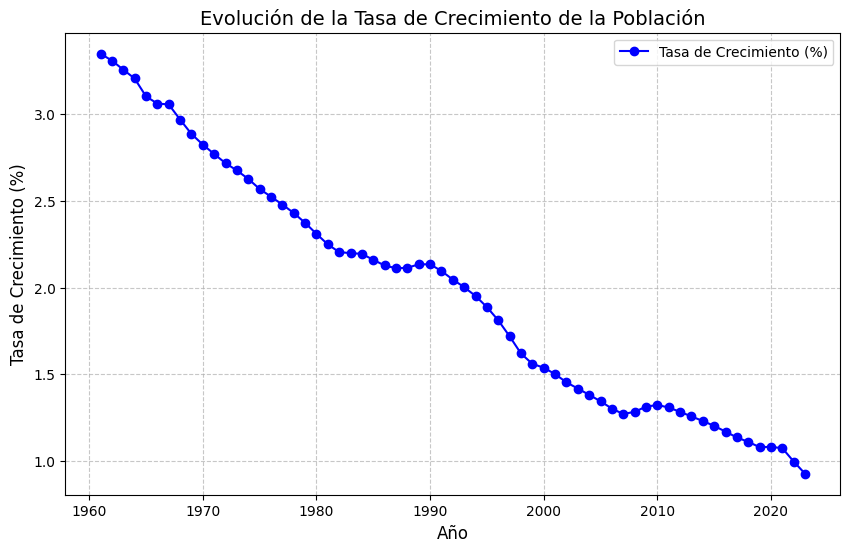

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_poblacion['anio'], df_poblacion['tasa_crecimiento'], marker='o', color='b', label='Tasa de Crecimiento (%)')
plt.title('Evolución de la Tasa de Crecimiento de la Población', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Tasa de Crecimiento (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


Sí, es completamente normal. Esto sucede debido a la diferencia entre crecimiento absoluto y crecimiento relativo:

Evolución de la población (primera imagen):

Muestra el crecimiento absoluto de la población. Incluso si el número de personas que se añaden a la población cada año es constante o aumenta ligeramente, la población total seguirá aumentando, lo que produce esta curva ascendente.
Tasa de crecimiento (segunda imagen):

Es una medida relativa. Representa el porcentaje de incremento de la población con respecto al año anterior.
Aunque la población sigue creciendo, al compararlo con una base cada vez mayor (la población total de años previos), el porcentaje de crecimiento disminuye. Este efecto se acentúa cuando las tasas de natalidad disminuyen o la mortalidad y la emigración aumentan.
En resumen:

La población total sigue aumentando porque el número absoluto de personas que se añaden es mayor que el número que sale (por muerte, emigración, etc.).
Sin embargo, el porcentaje de crecimiento disminuye porque la base poblacional sobre la que se calcula ese crecimiento es cada vez mayor.
Esto es un fenómeno común en países en desarrollo y desarrollados, donde la población sigue creciendo pero a tasas cada vez más bajas debido a factores como la transición demográfica y cambios en patrones sociales, económicos y de salud.